# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Example CSI

In [ ]:
sample_data = pd.read_csv("gdrive/MyDrive/RMBI_FYP/July data/20160701.csv")

In [ ]:
sample_data['ct'].count()

140967

In [ ]:
count = sample_data[['st','ct']].groupby(['st']).size().nlargest(830).reset_index(name='ct count')
count

,st,ct count
0,000002.sz,2131
1,002506.sz,592
2,300116.sz,550
3,000839.sz,512
4,002695.sz,462
...,...,...
825,601390.sh,56
826,000505.sz,55
827,000785.sz,55
828,002014.sz,55


In [ ]:
len(sample_data.st.unique())

2550

In [ ]:
processed_data = sample_data[sample_data['st'].isin(csi300)]

In [ ]:
processed_count = processed_data[['st','ct']].groupby(['st']).size().nlargest(95).reset_index(name='ct count')
processed_count

,st,ct count
0,000002.sz,2131
1,000768.sz,318
2,000066.sz,314
3,002673.sz,312
4,000725.sz,307
...,...,...
90,000708.sz,56
91,601390.sh,56
92,002049.sz,55
93,000728.sz,54


In [ ]:
processed_data['ct'].count()

17025

In [ ]:
len(processed_data.st.unique())

226

# Remove non CSI300 stocks data


In [ ]:
csi300 = set(pd.read_csv('gdrive/MyDrive/RMBI_FYP/CSI300.csv').CSI300)

In [ ]:
csi300

{'000001.SZ',
 '000002.SZ',
 '000063.SZ',
 '000066.SZ',
 '000069.SZ',
 '000100.SZ',
 '000157.SZ',
 '000166.SZ',
 '000333.SZ',
 '000338.SZ',
 '000425.SZ',
 '000538.SZ',
 '000568.SZ',
 '000596.SZ',
 '000625.SZ',
 '000627.SZ',
 '000651.SZ',
 '000656.SZ',
 '000661.SZ',
 '000671.SZ',
 '000703.SZ',
 '000708.SZ',
 '000723.SZ',
 '000725.SZ',
 '000728.SZ',
 '000768.SZ',
 '000776.SZ',
 '000783.SZ',
 '000786.SZ',
 '000858.SZ',
 '000860.SZ',
 '000876.SZ',
 '000895.SZ',
 '000938.SZ',
 '000961.SZ',
 '000963.SZ',
 '000977.SZ',
 '001979.SZ',
 '002001.SZ',
 '002007.SZ',
 '002008.SZ',
 '002024.SZ',
 '002027.SZ',
 '002032.SZ',
 '002044.SZ',
 '002049.SZ',
 '002050.SZ',
 '002120.SZ',
 '002129.SZ',
 '002142.SZ',
 '002146.SZ',
 '002153.SZ',
 '002157.SZ',
 '002179.SZ',
 '002202.SZ',
 '002230.SZ',
 '002236.SZ',
 '002241.SZ',
 '002252.SZ',
 '002271.SZ',
 '002304.SZ',
 '002311.SZ',
 '002352.SZ',
 '002371.SZ',
 '002384.SZ',
 '002410.SZ',
 '002414.SZ',
 '002415.SZ',
 '002422.SZ',
 '002456.SZ',
 '002460.SZ',
 '0024

In [ ]:
csi300 = [x.lower() for x in csi300]

In [ ]:
csi300

['601231.sh',
 '601872.sh',
 '603288.sh',
 '000063.sz',
 '002939.sz',
 '600588.sh',
 '000100.sz',
 '002001.sz',
 '002032.sz',
 '002241.sz',
 '002938.sz',
 '600745.sh',
 '000625.sz',
 '600085.sh',
 '000671.sz',
 '002044.sz',
 '600025.sh',
 '601318.sh',
 '300136.sz',
 '601088.sh',
 '002600.sz',
 '002508.sz',
 '002601.sz',
 '601988.sh',
 '002475.sz',
 '002352.sz',
 '002422.sz',
 '002958.sz',
 '603160.sh',
 '601607.sh',
 '600919.sh',
 '603833.sh',
 '300033.sz',
 '688008.sh',
 '601808.sh',
 '000066.sz',
 '600111.sh',
 '000661.sz',
 '000333.sz',
 '000860.sz',
 '600999.sh',
 '600050.sh',
 '600340.sh',
 '600048.sh',
 '601138.sh',
 '688036.sh',
 '002841.sz',
 '002916.sz',
 '002555.sz',
 '601989.sh',
 '002812.sz',
 '603501.sh',
 '002463.sz',
 '601216.sh',
 '603195.sh',
 '002311.sz',
 '002493.sz',
 '300059.sz',
 '600369.sh',
 '601398.sh',
 '000166.sz',
 '000895.sz',
 '600183.sh',
 '002120.sz',
 '601236.sh',
 '002384.sz',
 '600016.sh',
 '601877.sh',
 '000425.sz',
 '300529.sz',
 '600390.sh',
 '6006

In [ ]:
files = glob.glob("gdrive/MyDrive/RMBI_FYP/August data/*.csv")
for f in files:
    data = pd.read_csv(f)
    data = data[data['st'].isin(csi300)]
    data.to_csv(f)

In [ ]:
sample_data = sample_data[sample_data['st'].isin(csi300)]

In [ ]:
sample_data.shape

(17025, 5)

# Remove News Messages

Done through Subjectivity Inference Notebook

# Calculate Sentiment of Individual Messages

Done through Sentiment Inference Notebook

# Calculate Overall Daily Sentiment of each stock

In [ ]:
files = glob.glob("gdrive/MyDrive/RMBI_FYP/August data/*.csv")
for f in tqdm(files):
    data = pd.read_csv(f)
    sentiment_sum = pd.pivot_table(data, index="st",values=["positive_probs", "neutral_probs", "negative_probs"], aggfunc=np.sum)
    sentiment_sum["sentiment_index"] = np.log((1+sentiment_sum.positive_probs)/(1+sentiment_sum.negative_probs))
    sentiment_sum.sort_values(by=["sentiment_index"],ascending = False, inplace=True)
    sentiment_sum.to_csv("gdrive/MyDrive/RMBI_FYP/August Sentiment/"+f[-12:-4:1]+".csv")

100%|██████████| 30/30 [00:01<00:00, 21.66it/s]


# Example Daily Stock Recommendation

In [ ]:
sample = pd.read_csv("gdrive/MyDrive/RMBI_FYP/August Sentiment/20160830.csv")

In [ ]:
sample[['st','sentiment_index']]
sample = sample[['st', 'sentiment_index']]
sample['st'] = sample['st'].str.split('.').str[0]
sample['date'] = pd.to_datetime("20160830",format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sample

,st,sentiment_index,date
0,601618,1.239833,2016-08-30
1,601788,1.088398,2016-08-30
2,000708,0.955706,2016-08-30
3,601888,0.932101,2016-08-30
4,601288,0.915845,2016-08-30
...,...,...,...
237,300144,-0.767297,2016-08-30
238,603993,-0.822732,2016-08-30
239,000596,-0.892548,2016-08-30
240,600763,-0.912561,2016-08-30


# Concat Daily Sentiment of each stock

In [ ]:
files = glob.glob("gdrive/MyDrive/RMBI_FYP/August Sentiment/*.csv")
final_df = pd.DataFrame()
for f in tqdm(files):
  data = pd.read_csv(f)
  data = data[['st', 'sentiment_index']]
  data['st'] = data['st'].str.split('.').str[0]
  data['date'] = pd.to_datetime(f[-12:-4:1],format='%Y-%m-%d')
  final_df = pd.concat([final_df, data], ignore_index=True)
final_df.sort_values(["st", "date"], ascending=True, inplace=True)
final_df.to_csv("gdrive/MyDrive/RMBI_FYP/sentiment_index.csv", index=False)

In [ ]:
sentiment = pd.read_csv("gdrive/MyDrive/RMBI_FYP/sentiment_index.csv")

In [ ]:
sentiment

,st,sentiment_index,date
0,1,0.334205,2016-08-01
1,1,-0.288008,2016-08-02
2,1,0.211362,2016-08-03
3,1,-0.145837,2016-08-04
4,1,-0.016273,2016-08-05
...,...,...,...
7074,603993,-0.407702,2016-08-26
7075,603993,0.843190,2016-08-27
7076,603993,0.395038,2016-08-28
7077,603993,-0.763512,2016-08-29


In [ ]:
financials = pd.read_stata("gdrive/MyDrive/RMBI_FYP/hs300_largetrade.dta")

In [ ]:
financials

,stockcode,date,volume,return,marketvalue,bmr,betaval,std_volume,std_return,std_marketvalue,std_bmr,std_beta,imbalance,std_imbalance,lnsent,std_lnsent,newdate
0,600000,2014-08-01,199316283.0,-0.004082,182057888.0,1.138248,1.175549,0.038811,0.059297,0.076142,0.209333,0.531703,0.307199,0.494595,0.000000,0.501354,2014-08-01
1,600000,2014-08-04,167001355.0,0.016393,185042432.0,1.119889,1.135135,0.032519,0.064656,0.077401,0.205956,0.527897,0.100393,0.488544,-9.663071,0.181875,2014-08-04
2,600000,2014-08-05,116942080.0,-0.005040,184109760.0,1.125562,1.147159,0.022771,0.059047,0.077008,0.207000,0.529030,0.059492,0.487347,0.000000,0.501354,2014-08-05
3,600000,2014-08-06,134531042.0,-0.013171,181684816.0,1.140585,1.156278,0.026196,0.056919,0.075985,0.209763,0.529888,-0.134224,0.481678,0.000000,0.501354,2014-08-06
4,600000,2014-08-07,141244203.0,-0.018480,178327184.0,1.162061,1.169395,0.027503,0.055529,0.074569,0.213713,0.531123,-0.618749,0.467499,0.000000,0.501354,2014-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105932,603858,2018-06-11,6561633.0,-0.032384,33817280.0,0.390886,1.033165,0.001277,0.051890,0.013610,0.071869,0.518296,0.000000,0.000000,0.650498,0.522861,2018-06-11
105933,603858,2018-06-12,3909688.0,0.010887,34185452.0,0.386676,1.042215,0.000761,0.063215,0.013765,0.071095,0.519148,0.000000,0.000000,0.596072,0.521062,2018-06-12
105934,603858,2018-06-13,4460500.0,-0.025927,33299112.0,0.396968,1.095596,0.000868,0.053580,0.013391,0.072988,0.524175,0.000000,0.000000,-0.566473,0.482626,2018-06-13
105935,603858,2018-06-14,2653800.0,0.001024,33333202.0,0.396562,1.085438,0.000516,0.060634,0.013405,0.072913,0.523218,0.000000,0.000000,0.847413,0.529371,2018-06-14


In [ ]:
financials['return day t+1'] = financials['return'].shift(-1)

In [ ]:
financials

,stockcode,date,volume,return,marketvalue,bmr,betaval,std_volume,std_return,std_marketvalue,std_bmr,std_beta,imbalance,std_imbalance,lnsent,std_lnsent,newdate,return day t+1
0,600000,2014-08-01,199316283.0,-0.004082,182057888.0,1.138248,1.175549,0.038811,0.059297,0.076142,0.209333,0.531703,0.307199,0.494595,0.000000,0.501354,2014-08-01,0.016393
1,600000,2014-08-04,167001355.0,0.016393,185042432.0,1.119889,1.135135,0.032519,0.064656,0.077401,0.205956,0.527897,0.100393,0.488544,-9.663071,0.181875,2014-08-04,-0.005040
2,600000,2014-08-05,116942080.0,-0.005040,184109760.0,1.125562,1.147159,0.022771,0.059047,0.077008,0.207000,0.529030,0.059492,0.487347,0.000000,0.501354,2014-08-05,-0.013171
3,600000,2014-08-06,134531042.0,-0.013171,181684816.0,1.140585,1.156278,0.026196,0.056919,0.075985,0.209763,0.529888,-0.134224,0.481678,0.000000,0.501354,2014-08-06,-0.018480
4,600000,2014-08-07,141244203.0,-0.018480,178327184.0,1.162061,1.169395,0.027503,0.055529,0.074569,0.213713,0.531123,-0.618749,0.467499,0.000000,0.501354,2014-08-07,-0.002092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105932,603858,2018-06-11,6561633.0,-0.032384,33817280.0,0.390886,1.033165,0.001277,0.051890,0.013610,0.071869,0.518296,0.000000,0.000000,0.650498,0.522861,2018-06-11,0.010887
105933,603858,2018-06-12,3909688.0,0.010887,34185452.0,0.386676,1.042215,0.000761,0.063215,0.013765,0.071095,0.519148,0.000000,0.000000,0.596072,0.521062,2018-06-12,-0.025927
105934,603858,2018-06-13,4460500.0,-0.025927,33299112.0,0.396968,1.095596,0.000868,0.053580,0.013391,0.072988,0.524175,0.000000,0.000000,-0.566473,0.482626,2018-06-13,0.001024
105935,603858,2018-06-14,2653800.0,0.001024,33333202.0,0.396562,1.085438,0.000516,0.060634,0.013405,0.072913,0.523218,0.000000,0.000000,0.847413,0.529371,2018-06-14,-0.016159


In [ ]:
final_dataset = pd.merge(sentiment, financials, how='inner', left_on=['st', 'date'], right_on = ['stockcode','date'])

In [ ]:
final_dataset.drop(['stockcode','lnsent','std_lnsent','newdate'], axis=1, inplace=True)

In [ ]:
final_dataset.to_csv("gdrive/MyDrive/RMBI_FYP/sentimentwithfinancialdata.csv", index=False)

In [ ]:
final_dataset

,st,sentiment_index,date,volume,return,marketvalue,bmr,betaval,std_volume,std_return,std_marketvalue,std_bmr,std_beta,imbalance,std_imbalance,return day t+1
0,600000,0.475565,2016-08-01,22909943.0,0.006369,341568832.0,0.932755,0.348155,0.004460,0.062033,0.143429,0.171536,0.453798,0.000000,0.000000,-0.003165
1,600000,0.127053,2016-08-02,10877815.0,-0.003165,340487904.0,0.935716,0.338747,0.002118,0.059537,0.142974,0.172081,0.452912,0.000000,0.000000,-0.005079
2,600000,0.180315,2016-08-03,10583990.0,-0.005079,338758432.0,0.940493,0.330628,0.002060,0.059036,0.142244,0.172960,0.452147,0.000000,0.000000,-0.005105
3,600000,0.179014,2016-08-04,15610498.0,-0.005105,337028992.0,0.945319,0.336838,0.003039,0.059030,0.141514,0.173847,0.452732,-13.721265,0.084077,0.008980
4,600000,0.439360,2016-08-05,17648517.0,0.008980,340055552.0,0.936906,0.337354,0.003436,0.062716,0.142791,0.172300,0.452781,-0.003164,0.485513,0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,601998,-0.506050,2016-08-24,37514126.0,-0.010955,215212640.0,1.033686,0.573024,0.007304,0.057499,0.090128,0.190101,0.474971,-0.199502,0.479768,0.003165
1949,601998,-0.057159,2016-08-25,24249438.0,0.003165,215893696.0,1.030425,0.541252,0.004721,0.061194,0.090416,0.189501,0.471979,-0.306575,0.476634,0.004732
1950,601998,-0.301170,2016-08-26,36138767.0,0.004732,216915280.0,1.025573,0.557594,0.007036,0.061604,0.090846,0.188608,0.473518,1.591118,0.532167,-0.014129
1951,601998,-0.367035,2016-08-29,29777993.0,-0.014129,213850544.0,1.040270,0.557021,0.005798,0.056668,0.089554,0.191312,0.473464,-1.559968,0.439956,0.004777


In [ ]:
test = pd.read_csv("gdrive/MyDrive/RMBI_FYP/sentimentwithfinancialdata.csv")

In [ ]:
test

,st,sentiment_index,date,volume,return,marketvalue,bmr,betaval,std_volume,std_return,std_marketvalue,std_bmr,std_beta,imbalance,std_imbalance,return day t+1
0,600000,0.475565,2016-08-01,22909943.0,0.006369,341568830.0,0.932755,0.348155,0.004460,0.062033,0.143429,0.171536,0.453798,0.000000,0.000000,-0.003165
1,600000,0.127053,2016-08-02,10877815.0,-0.003165,340487900.0,0.935716,0.338747,0.002118,0.059537,0.142974,0.172081,0.452912,0.000000,0.000000,-0.005079
2,600000,0.180315,2016-08-03,10583990.0,-0.005079,338758430.0,0.940493,0.330628,0.002060,0.059036,0.142244,0.172960,0.452147,0.000000,0.000000,-0.005105
3,600000,0.179014,2016-08-04,15610498.0,-0.005105,337029000.0,0.945319,0.336838,0.003039,0.059030,0.141514,0.173847,0.452732,-13.721265,0.084077,0.008980
4,600000,0.439360,2016-08-05,17648517.0,0.008980,340055550.0,0.936906,0.337354,0.003436,0.062716,0.142791,0.172300,0.452781,-0.003164,0.485513,0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,601998,-0.506050,2016-08-24,37514126.0,-0.010955,215212640.0,1.033686,0.573024,0.007304,0.057499,0.090128,0.190101,0.474971,-0.199502,0.479768,0.003165
1949,601998,-0.057159,2016-08-25,24249438.0,0.003165,215893700.0,1.030425,0.541252,0.004721,0.061194,0.090416,0.189501,0.471979,-0.306575,0.476634,0.004732
1950,601998,-0.301170,2016-08-26,36138767.0,0.004732,216915280.0,1.025573,0.557594,0.007036,0.061604,0.090846,0.188608,0.473518,1.591118,0.532167,-0.014129
1951,601998,-0.367035,2016-08-29,29777993.0,-0.014129,213850540.0,1.040270,0.557021,0.005798,0.056668,0.089554,0.191312,0.473464,-1.559968,0.439956,0.004777


In [ ]:
st601998 = final_dataset[final_dataset.st==601998]

In [ ]:
st601998

,st,sentiment_index,date,volume,return,marketvalue,bmr,betaval,std_volume,std_return,std_marketvalue,std_bmr,std_beta,imbalance,std_imbalance
1931,601998,0.146405,2016-08-01,49960213.0,0.005008,204996848.0,1.085199,0.636626,0.009728,0.061676,0.085819,0.199576,0.480959,-0.370906,0.474752
1932,601998,0.825470,2016-08-02,25392726.0,-0.011628,202613168.0,1.097966,0.627678,0.004944,0.057322,0.084813,0.201924,0.480117,-0.334059,0.475830
1933,601998,0.024523,2016-08-03,14652117.0,-0.008403,200910544.0,1.107271,0.631199,0.002852,0.058167,0.084095,0.203635,0.480448,-0.847461,0.460806
1934,601998,0.138853,2016-08-04,20812077.0,-0.001695,200570016.0,1.109150,0.622640,0.004052,0.059922,0.083951,0.203981,0.479642,-14.786592,0.052902
1935,601998,0.834747,2016-08-05,37058759.0,0.011885,202953696.0,1.096123,0.613371,0.007216,0.063476,0.084957,0.201585,0.478770,0.735260,0.507122
1936,601998,0.425059,2016-08-08,22311124.0,0.006711,204315808.0,1.088816,0.616473,0.004344,0.062122,0.085532,0.200241,0.479062,-13.364102,0.094528
1937,601998,0.269084,2016-08-09,24140871.0,0.010000,206358960.0,1.078036,0.622928,0.004700,0.062983,0.086393,0.198258,0.479669,13.122365,0.869609
1938,601998,0.383944,2016-08-10,19949176.0,-0.001650,206018432.0,1.079818,0.621242,0.003884,0.059934,0.086250,0.198586,0.479511,12.984023,0.865561
1939,601998,0.526036,2016-08-11,89878174.0,0.029752,212147904.0,1.048619,0.445576,0.017501,0.068152,0.088835,0.192847,0.462970,0.450924,0.498801
1940,601998,1.112779,2016-08-12,65585684.0,0.032103,218958432.0,1.016003,0.526568,0.012770,0.068767,0.091708,0.186848,0.470596,1.424481,0.527291


In [ ]:
import matplotlib.pyplot as plt

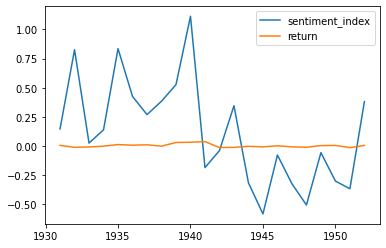

In [ ]:
st601998[['sentiment_index','return']].plot()